<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_541_error_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

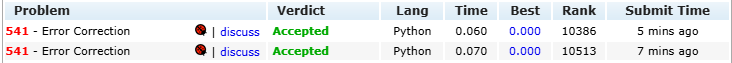

**@PDF: [UVA 541 - Error Correction](https://onlinejudge.org/external/5/541.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

# UVA 541 Error Correction

A boolean matrix has the parity property when each row and each column has an even sum, i.e. contains an even number of bits which are set. Here's a $4 \times 4$ matrix which has the parity property:

1 0 1 0\
0 0 0 0\
1 1 1 1\
0 1 0 1


The sums of the rows are 2, 0, 4 and 2. The sums of the columns are 2, 2, 2 and 2.

Your job is to write a program that reads in a matrix and checks if it has the parity property. If not, your program should check if the parity property can be established by changing only one bit. If this is not possible either, the matrix should be classified as corrupt.

## Input

The input file will contain one or more test cases. The first line of each test case contains one integer $n (n<100)$, representing the size of the matrix. On the next n lines, there will be n integers per line. No other integers than '0' and '1' will occur in the matrix. Input will be terminated by a value of 0 for n.

## Output

For each matrix in the input file, print one line. If the matrix already has the parity property, print 'OK'. If the parity property can be established by changing one bit, print 'Change bit (i,j)' where i is the row and j the column of the bit to be changed. Otherwise, print 'Corrupt'.

## Sample Input

4\
1 0 1 0\
0 0 0 0\
1 1 1 1\
0 1 0 1\
4\
1 0 1 0\
0 0 1 0\
1 1 1 1\
0 1 0 1\
4\
1 0 1 0\
0 1 1 0\
1 1 1 1\
0 1 0 1\
0


## Sample Output

OK\
Change bit (2,3)\
Corrupt

In [ ]:
from sys import stdin, stdout

while True:  # This initiates an infinite loop. In the context of online judges, this loop is designed to process multiple test cases within a single execution. The judge provides several inputs, and the program keeps running until it encounters a specific end-of-input signal.
    dim = int(input())  # Reads an integer from standard input, which represents the dimension of a square matrix.

    if dim == 0:  # This condition checks for the termination signal. A dimension of 0 is used to indicate the end of input, signaling that there are no more matrices to process.
        break  # If the dimension is 0, the loop breaks, and the program finishes.

    row_mismatch = -1  # Initializes a variable to store the row number with a mismatch. It's initialized to -1, indicating no mismatch found yet.
    col_mismatch = -1  # Initializes a variable to store the column number with a mismatch. It's also initialized to -1.
    corrupt = False  # A boolean flag to indicate if the matrix is corrupt (more than one mismatch). Initially set to False.
    matrix = [[] for j in range(dim)]  # Creates a 2D list (matrix) with dimensions dim x dim. It's initialized as a list of empty lists.
    for i in range(dim):  # This loop iterates through each row of the matrix.
        entry = list(map(int, input().split()))  # Reads a line of space-separated integers from standard input and converts them into a list.

        if corrupt:  # If the matrix is already marked as corrupt, skip further processing of rows.
            continue  # This optimization avoids unnecessary computations once corruption is detected.

        for j, e in enumerate(entry):  # This inner loop iterates through each element 'e' in the current row. 'j' is the column index.
            matrix[j].append(e)  # Appends the element 'e' to the corresponding column in the 'matrix'. This effectively transposes the input.
        if sum(entry) % 2:  # Checks if the sum of elements in the current row is odd. The modulo operator (%) returns the remainder of the division. If the remainder is 1, the sum is odd.
            if row_mismatch == -1:  # If this is the first row with an odd sum...
                row_mismatch = i + 1  # Record the row number (i + 1 because row indices start from 1).
            else:  # If we've already found a row with an odd sum...
                corrupt = True  # The matrix is corrupt because there's more than one row with an odd sum.

    if not corrupt:  # If the matrix is not corrupt after checking all rows...
        for j, entry in enumerate(matrix):  # Iterate through each column (which is now a list in 'matrix').
            if sum(entry) % 2:  # Check if the sum of elements in the current column is odd.
                if col_mismatch == -1:  # If this is the first column with an odd sum...
                    col_mismatch = j + 1  # Record the column number.
                else:  # If we've already found a column with an odd sum...
                    corrupt = True  # The matrix is corrupt.

    if not corrupt:  # If the matrix is not corrupt after checking all rows and columns...
        if col_mismatch == row_mismatch == -1:  # If no row and no column have an odd sum...
            print("OK")  # The matrix is considered "OK".
        else:  # If exactly one row and one column have an odd sum...
            print("Change bit ({},{})".format(row_mismatch, col_mismatch))  # Print the coordinates of the bit to change.
    else:  # If the matrix is corrupt (more than one row or column with an odd sum)...
        print("Corrupt")  # Print "Corrupt".